
# Estatística - Descritiva 


Um breve resumo de alguns comandos python.


Resultado Esperado

1. Entendimento de médias, medianas, desvio padrão e quartis.
1. Entendimento de propriedades das médias
1. Entender como sumarizar dados.
1. Mais importante, entender as falácias de sumarização de dados.







In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [4]:
plt.ion()

In [5]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Esconder linhas curvadas a esquerda e acima
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # mostrar marcas a esquerda a linhas curvadas abaixo
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


## Introdução

A estatística refere-se à matemática e técnicas com as quais pode-se entender os dados. Para introdução a Ciência de Dados, vale a pena relembrar: sumarização de bases de dados com médias, medianas e desvios.

## Descrevendo uma coluna bem comportada de dados

Os histogramas pode ajudar no entendimento dos dados. Como ponto de partida, um dataset com as músicas populares (semanalmente) de 2000 até 2018 será utilizado para os exemplos de visualização e descrição de dados. 

**Sempre visualize seus dados**. 

Observe a indicação de `na_values`.

#### Histogramas

In [6]:
# 1. importar os dados.
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/05-Tendencias-Centrais/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')
# 2. Removendo na
df = df[['date', 'artist', 'title', 'duration_ms', 'spotify_id', 'lyrics']]
df = df.dropna() # executar após a exibição do df bruto 
#df.count()
#df.head()

Quantas músicas há no dataset, agora no df!

In [7]:
dur = df['duration_ms']
dur.shape

(7193,)

Remover duplicatas, uma músicas pode aparecer mais de uma vez na base!

In [8]:
dur = dur.drop_duplicates()
dur.shape

(5387,)

Converter a duração para minutos.

In [9]:
data = dur / (1000 * 60)
data.head()

1    2.763667
2    2.425117
5    3.465083
7    3.513117
8    3.220000
Name: duration_ms, dtype: float64

Agora, o histograma!!!

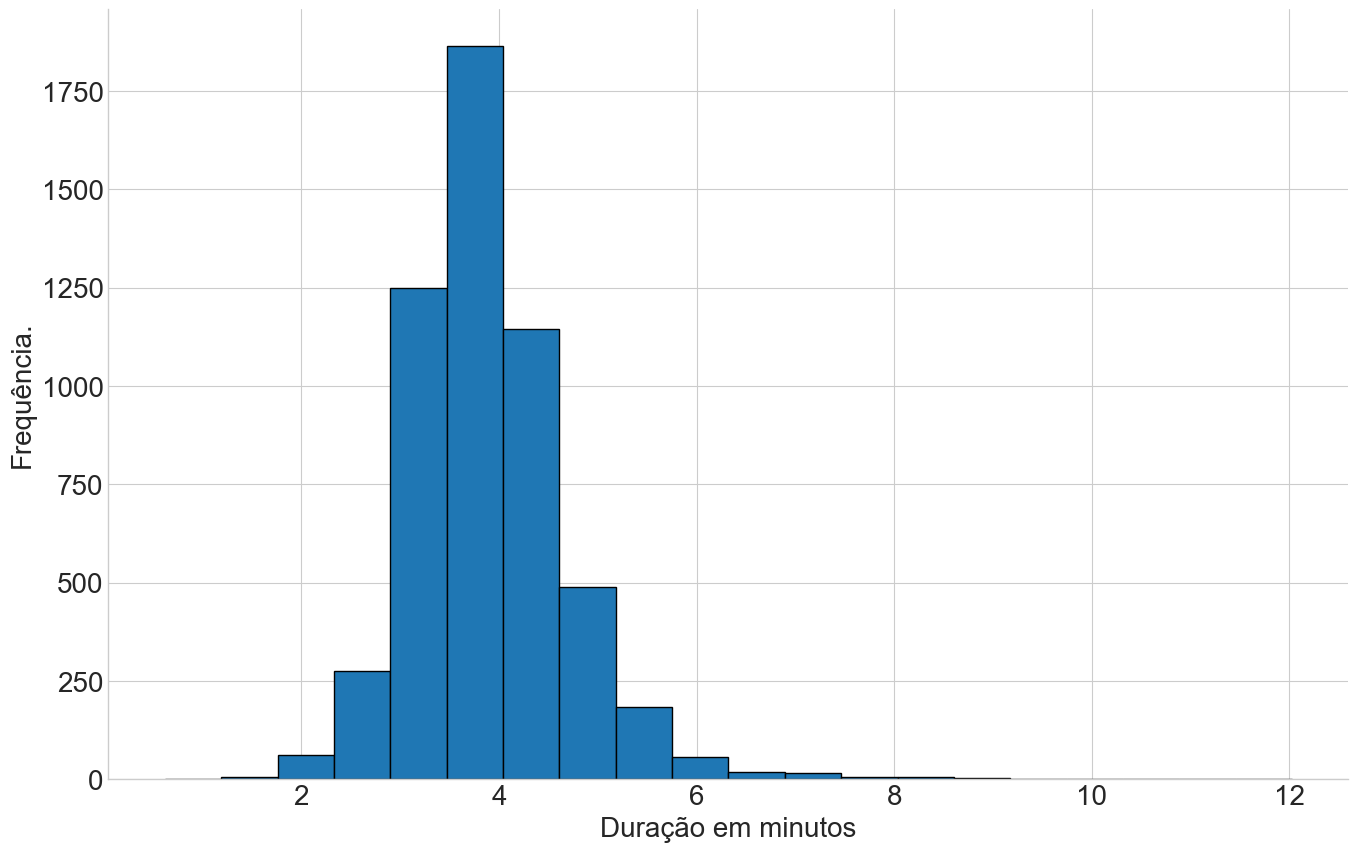

In [10]:
plt.hist(data, bins=20, edgecolor='k')
plt.xlabel('Duração em minutos')
plt.ylabel('Frequência.')
despine(plt.gca())
plt.show()

#### CDFs

Construir uma CDF. A função de nome CDF (em inglês de Cumulative Distribution Function) ou simplesmente Função Distribuição que é igual à probabilidade de que a variável aleatória X assuma um valor inferior ou igual a determinado x(**caso de distruição uniforme x pode estar no intervalo de [0 e 1]**. Note que, via de regra, para cada x, a função CDF assumirá um valor diferente. Para estimar uma CDF de forma empírica, tem-se os seguintes passos:

1. Ordenar os dados `x = np.sort(data)`
1. Contar os pontos menores do que `x[i]` existem para cada `i`
    1. Para isto, pode-se utilizar um vetor `y = np.arange(len(data))`. y é um contagem cumulativa.
    1. Em y há a contagem de quantos pontos existe até um ponto i, i.e., `y[i] = #pts < x[i]`.
1. Normalize `y`

In [ ]:
def ecdf(data):
    x = np.sort(data)
    count = np.arange(len(data))
    y = count.cumsum()
    y = y / y.max()
    return x, y

Passo a passo da função acima...

In [ ]:
def ecdf(data):
    #x = np.sort(data)
    #return x
  
    count = np.arange(len(data))
    y = count.cumsum()
    y = y / y.max()
    return x,  y

In [ ]:
print(ecdf(data))

(array([       -inf,  0.61778333,  0.75      , ...,  9.96555   ,
       11.47421667, 12.02633333]), array([0.00000000e+00, 6.89313321e-08, 2.06793996e-07, ...,
       9.99257541e-01, 9.99628736e-01, 1.00000000e+00]))


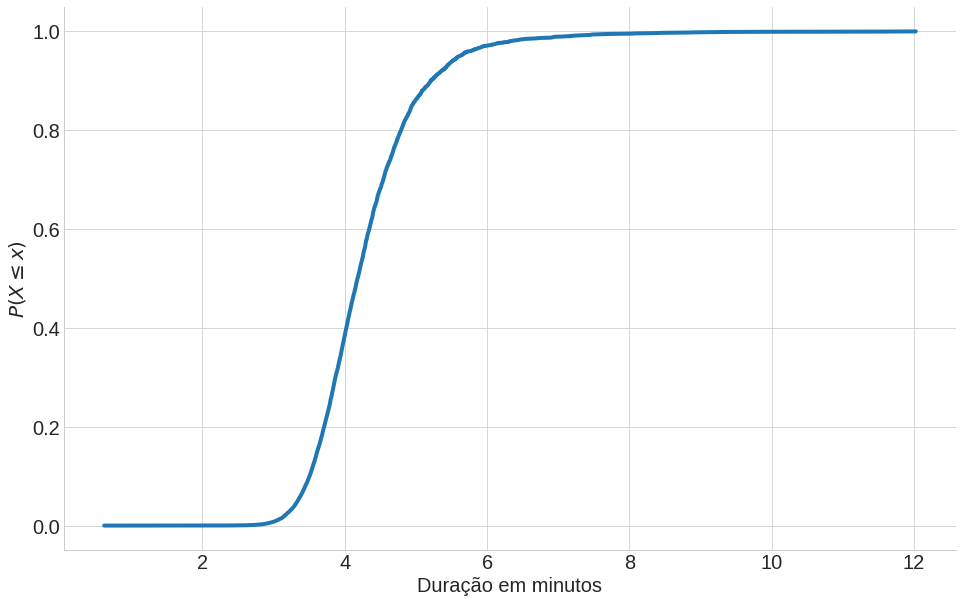

In [ ]:
x, y = ecdf(data)
plt.plot(x, y)
plt.xlabel('Duração em minutos')
plt.ylabel('$P(X \leq x)$')
despine()
plt.show()

A biblioteca **statsmodels** tem a mesma função. 

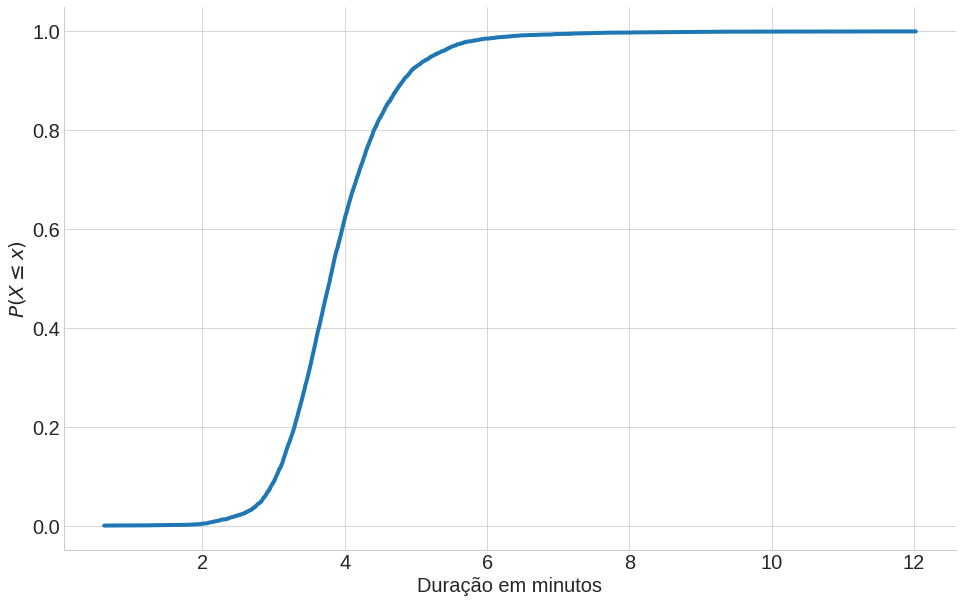

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data)
x = ecdf.x
y = ecdf.y
plt.plot(x, y)
plt.xlabel('Duração em minutos')
plt.ylabel('$P(X \leq x)$')
despine()
plt.show()

## Tendências Centrais

Tendência central é uma medida de valores numa amostra que identifica os diferentes pontos centrais nos dados, muitas vezes referidos como “médias”. As medidas mais comuns de tendência central são a média, a mediana e a moda.

Sumarização de dados, sumarizar os dados das músicas. Uma descrição óbvia de qualquer conjunto $x_1, x_2, ..., x_n$ de dados é simplesmente os dados em si:

In [ ]:
data.head()

1    2.763667
2    2.425117
5    3.465083
7    3.513117
8    3.220000
Name: duration_ms, dtype: float64

Para um conjunto de dados pequeno o suficiente, isso pode até ser a melhor descrição. Mas, para um conjunto de dados maior, isso é difícil e provavelmente opaco. Por esse motivo, a estatística pode ajudar a destilar e comunicar características relevantes dos dados.

Iniciar de forma simples verificando o número de pontos de dados:

In [ ]:
num_points = len(data)
print("numero de pontos:", num_points)

numero de pontos: 5387


Um vetor numpy tem diferentes atributos para pegar a dimensão.

In [ ]:
data.size

5387

In [ ]:
# Shape indica o tamanho para cada dimensão, em uma matriz teríamos dois valores.
data.shape 

(5387,)

In [ ]:
# note como os dados originais tem 5 colunas
df.shape

(7193, 6)

Quais são o maior e menor valores do dado em questão:

In [ ]:
largest_value = max(data) 
smallest_value = min(data)
print("maximo: ", largest_value, "\nminimo: ", smallest_value)

maximo:  12.026333333333334 
minimo:  0.6177833333333334


Ou, usando numpy / pandas

In [ ]:
data.max()

12.026333333333334

In [ ]:
data.min()

0.6177833333333334

In [ ]:
np.min(data)

0.6177833333333334

Casos especiais quando há a necessidade de saber os valores em posições específicas:

In [ ]:
sorted_values = np.sort(data)
smallest_value = sorted_values[0] 
second_smallest_value = sorted_values[1] 
second_largest_value = sorted_values[-2] 
print("menor valor: ", smallest_value)
print("segundo menor valor: ", second_smallest_value)
print("segundo maior valor: ", second_largest_value)

menor valor:  0.6177833333333334
segundo menor valor:  0.75
segundo maior valor:  11.474216666666667


Buscar os valores top 20

In [ ]:
sorted_values[-20:]

array([ 7.45733333,  7.46821667,  7.47621667,  7.5608    ,  7.67621667,
        7.69736667,  7.93778333,  8.03933333,  8.06911667,  8.22333333,
        8.38181667,  8.42955   ,  8.67978333,  8.83755   ,  8.93333333,
        9.12888333,  9.36      ,  9.96555   , 11.47421667, 12.02633333])

### **Média**

As vezes, é necessário identidicar a centralização dos dados. Para chegar em tal resultado, a média $${\bar {x}}$$ (a soma dos dados dividida pelo número de elementos) pode ser uma alternativa: 

$${\bar {x}}={\frac {1}{n}}\left(\sum _{i=1}^{n}{x_{i}}\right)={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}$$ 

Uma função para o cálculo da média:

In [ ]:
def mean(x):
    return sum(x) / len(x)

print("media: ", mean(data))

media:  3.8836518470391788


Ou de forma equivalente, pode-se usar x.mean() caso x seja um vetor `numpy`.

In [ ]:
data.mean()

3.883651847039168

Ou ainda

In [ ]:
np.mean(data)

3.883651847039168

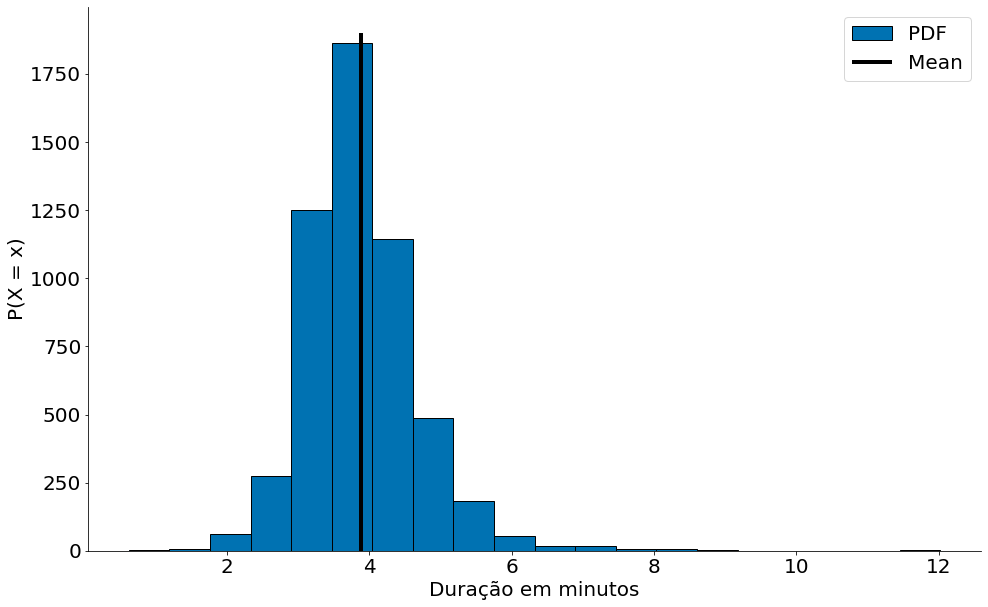

In [ ]:
plt.hist(data, bins=20, label='PDF', edgecolor='k')
plt.vlines(data.mean(), 0, 1900, label='Mean', edgecolor='k')
plt.xlabel('Duração em minutos')
plt.ylabel('P(X = x)')
plt.legend()
despine()
plt.show()

### **Mediana**

Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados. No conjunto de dados {1, 3, 3, 6, 7, 8, 9}, por exemplo, a mediana é 6. Se houver um número par de observações, não há um único valor do meio. Então, a mediana é definida como a média dos dois valores do meio. No conjunto de dados {3, 5, 7, 9}, a mediana é:
$${\frac {5+7}{2} = 6}$$ 

Observe que, ao contrário da média, a mediana não depende de todos os valores contidos na amostra. Por exemplo, se o maior ponto ou o menor ponto for alterado, os pontos do meio permanecem iguais, o que significa que a mediana também.



In [ ]:
def median(v):
    """encontra o valor mais intermediario de v"""
    n = len(v)
    sorted_v = list(sorted(v))
    midpoint = n // 2 # // eh a divisao inteira
    
    if n % 2 == 1:
        # se impar, retorna o valor do meio
        return sorted_v[midpoint]
    else:
        # se par, retorna a media dos dois valores intermediarios
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [ ]:
def median_v2(v):
    n = len(v)
    sorted_v = sorted(v)
    return (sorted_v[math.floor((n-1)/2)] + sorted_v[math.ceil((n-1)/2)])/2

In [ ]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8, 9]
print("mediana de a = ", median(a))
print("mediana de b = ", median(b))

print("mediana da duração das músicas:", median(data))

mediana de a =  2.5
mediana de b =  7
mediana da duração das músicas: 3.79545


Não há a necessidade de escrever um código para calcular a mediana. Na prática, pode-se usar a `median` do numpy.

In [ ]:
np.median(a)

2.5

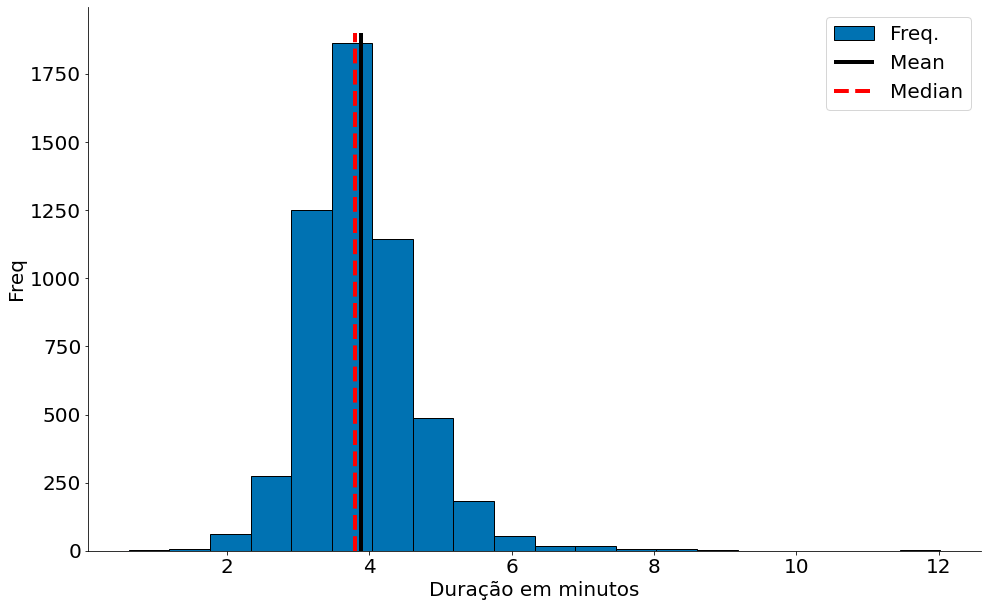

In [ ]:
plt.hist(data, bins=20, label='Freq.', edgecolor='k')
plt.vlines(data.mean(), 0, 1900, label='Mean', edgecolor='k')
plt.vlines(data.median(), 0, 1900, linestyles='--', label='Median', color='red')
plt.xlabel('Duração em minutos')
plt.ylabel('Freq')
plt.legend()
despine()
plt.show()

### **Boxplot**

Um boxplot pode ser usado para representar a variação de dados observados de uma variável numérica por meio de quartis. Neste caso, para observar as durações de filmes. 

1. primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
1. segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
1. terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil

<ipython-input-1-61fb73fbad47>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Duração'])


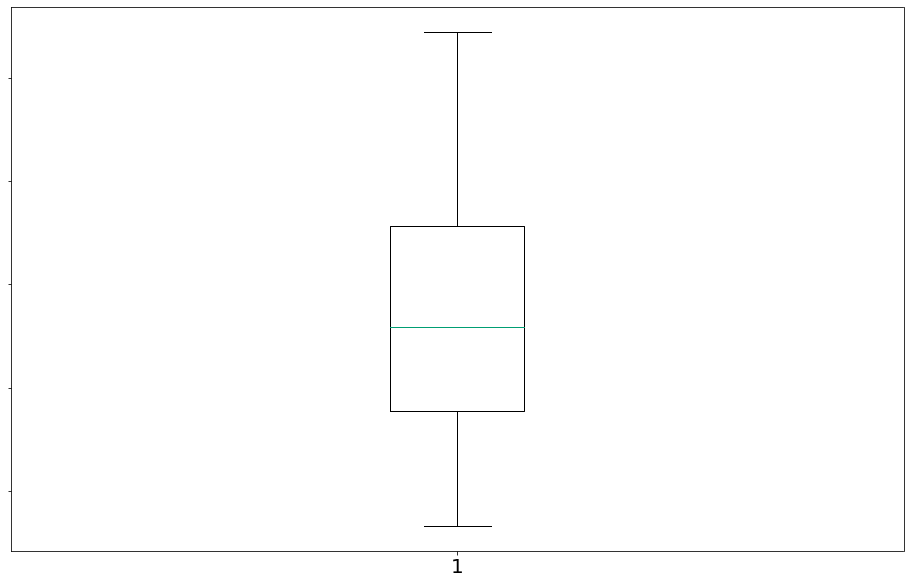

In [ ]:
# com whis=[5, 95] eu mostro P(X < x) = 5% e P(X > x) = 95%
plt.boxplot([data], sym='', vert=True, whis=[5, 95])
ax = plt.gca()
ax.set_yticklabels(['Duração'])
plt.show()

Claramente, a média é mais simples de calcular e varia suavemente conforme a alteração dos dados. Dado um conjunto `n` de pontos de dados e um deles aumentar em alguma quantidade pequena `e`, então necessariamente a média aumentará em `e/n`. (Isso torna a média passível de todo tipo de truque de cálculo.) No entanto, para encontrar a mediana, é necessário ordenar os dados. E alterar um dos pontos de dados em uma pequena quantidade `e` pode aumentar a mediana por `e`, por algum número menor que `e` ou não a modificar de qualquer forma (dependendo do resto dos dados).

**Observação:** é possível calcular a mediana sem ordenação, mas não é foco aqui. 

Ao mesmo tempo, a média é muito sensível a valores discrepantes (*outliers*). Se a música mais longa fosse de mais de 1h (https://www.youtube.com/watch?v=10SnNfxjAI8), a média seria afetada. Em contraprtida, a mediana permaneceria a mesma. Se os valores discrepantes forem, provavelmente, dados incorretos (ou, de outro modo, não representativos de qualquer fenômeno que se busca entender), a média poderá, às vezes, nos fornecer uma imagem enganosa. Por exemplo, a história é frequentemente contada que em meados da década de 1980, a graduação da Universidade da Carolina do Norte com a maior média de salário inicial era a geografia. A razão disso? A estrela da NBA (e *outlier*) Michael Jordan formou-se em geografia.

In [ ]:
data_new = data.copy()
# Vamos supor uma música gigantesca!
data_new = data_new.append(pd.Series([9999]))
print(data.mean(), data_new.mean())

3.883651847039168 5.738721696362286


Observe como a mediana se mantém!

In [ ]:
print(data.median(), data_new.median())

3.79545 3.7955


Uma generalização da mediana é o quantil, que representa o menor valor maior que um certo percentual dos dados (A mediana representa o valor maior que 50% dos dados.)

In [ ]:
def quantile(x, p):
    """retorna o pth-percentil em x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]


print("quantil 10: ", quantile(data, 0.10))
print("quantil 25: ", quantile(data,0.25))
print("quantil 75: ", quantile(data,0.75))
print("quantil 90: ", quantile(data,0.90))

quantil 10:  3.0353333333333334
quantil 25:  3.38755
quantil 75:  4.283333333333333
quantil 90:  4.819333333333334


## **MODA**
Moda amostral de um conjunto de dados trata do valor que ocorre com maior frequência ou o valor mais comum em um conjunto de dados. Moda é especialmente útil quando os valores ou as observações não são numéricos, casos em que a média e a mediana não podem ser definidas. Por exemplo, a moda da amostra {maçã, banana, laranja, laranja, laranja, pêssego} é laranja

A moda calcula a medida de tendência central dos dados, que é(são) o(s) valor(es) mais comum(ns). Moda unimodal, bimodal e multimodal.

In [ ]:
def mode(x):
    """retorna uma lista, pois os dados podem ter mais de uma moda"""
    x = np.asanyarray(x)
    unique, counts = np.unique(x, return_counts=True)
    max_count = counts.max()
    return unique[counts == max_count]

In [ ]:
a = [1, 2, 3, 4, 2, 4, 4]
print("moda de a: ", mode(a))

moda de a:  [4]


Para casos contínuos, como as músicas, a moda faz pouco sentido. Logo é necessário arredondá-los.

In [ ]:
print("moda das músicas em minutos truncadas: ",
      mode(np.round(data, 0)))

moda das músicas em minutos truncadas:  [4.]


### Transformadas

Trata-se de uso de descritores para descrever dados, Por exemplo, dados que possuem uma "cauda longa", como uma amostra da [distribuição de Pareto](https://en.wikipedia.org/wiki/Pareto_distribution). Um bom exemplo de dados deste tipo é a frequência de palavras nas letras de cada música.
Um exemplo aqui é construir uma nova série com tal informação!

Cuidado com os dados.
1. Músicas se repetem na billboard.
2. Retirar acentos e pontuação. Para tal, expressões regulares são úteis.

In [ ]:
from collections import Counter

import re

counter = Counter()
for row in df['lyrics'].unique(): # Com unique eu filtro letras iguais.
    # o código re.sub(r'[^\w\s]', '', row.lower()) tira todos os acentos!
    words = re.sub(r'[^\w\s]', '', row.lower()).strip().split()
    counter.update(set(words))

palavras = pd.Series(counter)
palavras.head(20)

fit          160
monte          7
didnt        675
another      833
who         1476
put         1551
secret       104
ceilin        20
these       1331
colorado       7
ran          152
time        2871
day         1457
runnin       254
think       1851
girls        679
winnin        37
ima          513
before       956
broke        369
dtype: int64

Verificar o resultado no histograma dos dados:

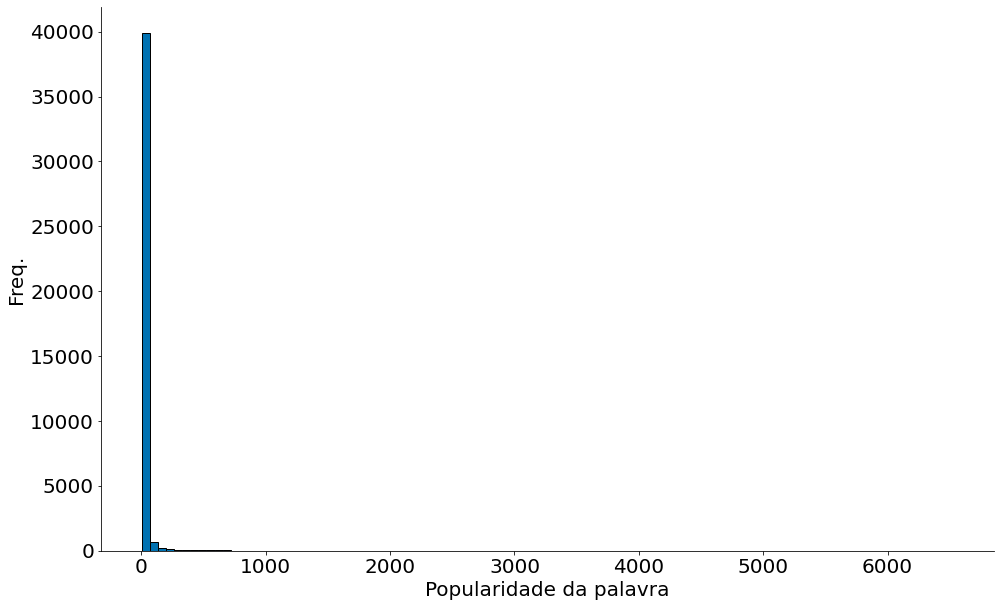

In [ ]:
plt.hist(palavras, bins=100, edgecolor='k')
plt.xlabel('Popularidade da palavra')
plt.ylabel('Freq.')
despine()
plt.show()

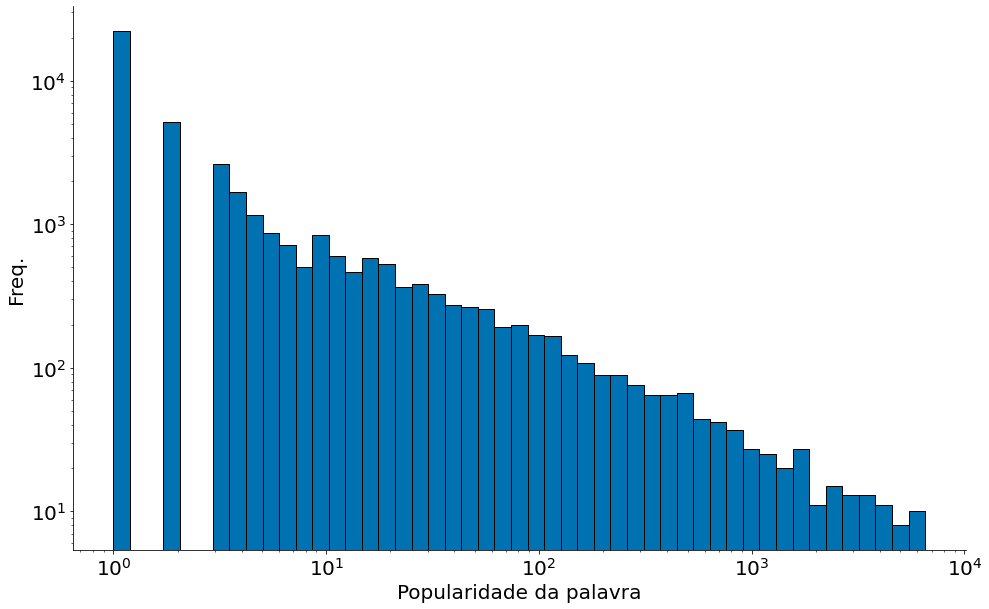

In [ ]:
bins = np.logspace(np.log10(palavras.min()), np.log10(palavras.max()))
plt.hist(palavras, bins=bins, edgecolor='k')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Popularidade da palavra')
plt.ylabel('Freq.')
despine()
plt.show()

A grande maioria dos valores é menor que $10$, mas existe uma quantidade significativa de valores na casa das centenas e até dos milhares. 

Nesse caso, qual é o melhor descritor para esses dados?

In [ ]:
print(mean(palavras),
      median(palavras),
      max(palavras),
      mode(palavras))

22.376421549730146 1.0 6528 [1]


Ao que parece, todos eles são importantes.

### Variância e Desvio Padrão

Dispersão refere-se a medidas de como se espalham os dados. Normalmente, são estatísticas para as quais valores próximos de zero significam que os dados não se espalham de forma alguma e para as quais grandes valores significam que os dados estão muito dispersos. Por exemplo, uma medida muito simples é o intervalo (ou *range*), que é apenas a diferença entre os elementos maiores e menores:

In [ ]:
# "range" já significa algo em Python, então vamos usar outro nome
def data_range(x):
    return max(x) - min(x)

In [ ]:
print("range: ", data_range(data))

range:  11.40855


O intervalo é zero precisamente quando `max` e `min` são iguais, o que só pode acontecer se os elementos de `x` forem todos iguais, o que significa que os dados são tão similares (ou não dispersos) quanto possível. Por outro lado, se o intervalo for grande, o `max` é muito maior que o `min` e os dados estão mais espalhados.

Uma medida de dispersão é a variância $s^2$. Quando a variância da população é estimada usando $n$ amostras aleatórias $x_1, x_2, ..., x_n$ a fórmula seguinte é um estimador não enviesado:

$$s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-\overline {x}\right)^{2}$$

Dado um conjunto de dados, a variância é uma medida de dispersão que mostra o quão distante cada valor desse conjunto está do valor central (médio). Quanto menor é a variância, mais próximos os valores estão da média; mas quanto maior ela é, mais os valores estão distantes da média.

O código abaixo faz o mesmo:

In [ ]:
def de_mean(x):
    """translada x subtraindo sua média (então o resultado tem média 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assume que x tem pelo menos dois elementos"""
    n = len(x)
    deviations = de_mean(x)
    deviations = np.array(deviations) #vamos usar numpy muito de agora em diante
    return np.sum(deviations ** 2) / (n-1)
    #voce pode usar a funcao que implementamos anteriormente:
    #return sum_of_squares(deviations) / (n - 1)

print("variancia: ", variance(data))

variancia:  0.6377261715977038


A primeira observação é o uso do módulo `numpy`. esse módulo contém diversas operações sobre listas, que são implementadas de forma eficiente.

Segundo, parece que a variância é quase o desvio médio da média, exceto pelo fato de estarmos dividindo por `n-1` em vez de `n`. De fato, quando estamos lidando com uma amostra de uma população maior, $\overline {x}$ é apenas uma estimativa da média real, o que significa que, em média $\left(x_{i}-\overline {x}\right)^{2}$ é uma subestimativa do desvio ao quadrado de $x_i$ em relação à média. Por isso que nós dividimos por `n-1` ao invés de `n`. Para mais informações, consulte o [Wikipedia](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation).

Agora, quaisquer que sejam as unidades em que nossos dados estão (por exemplo, "# de amigos"), todas as nossas medidas de tendência central estão nessa mesma unidade. O intervalo será similarmente nessa mesma unidade. A variância, por outro lado, tem unidades que são o quadrado das unidades originais (por exemplo, " # de amigos ao quadrado"). Como pode ser difícil entender essa medida, muitas vezes olhamos para o desvio padrão $s = \sqrt{s^2}$:

In [ ]:
print("desvio padrao: ", np.std(data))

desvio padrao:  0.7985034684732251


Tanto o intervalo quanto o desvio padrão têm o mesmo problema discrepante que vimos anteriormente para a média. Usando o mesmo exemplo, se nosso usuário mais amigável tivesse `2000` amigos, o desvio padrão seria muito maior somente por causa desse usuário. Uma alternativa mais robusta calcula a diferença entre o valor do 75º e do 25º percentil:

In [ ]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print("intervalo interquartil:", interquartile_range(data))

intervalo interquartil: 0.8957833333333332


Essa medida é muito pouco afetada por *outliers*.

In [ ]:
print("Dispersão para a duração das músicas:")
print("Intervalo:", data_range(data))
print("Variância:", np.var(data))
print("Desvio padrão:", np.std(data))
print("IQR:", interquartile_range(data))

Dispersão para a duração das músicas:
Intervalo: 11.40855
Variância: 0.6376077891637707
Desvio padrão: 0.7985034684732251
IQR: 0.8957833333333332


Medidas de dispersão para dados com "cauda longa":

In [ ]:
print("Dispersão para as palavras:")
print("Intervalo:", data_range(palavras))
print("Variância:", np.var(palavras))
print("Desvio padrão:", np.std(palavras))
print("IQR:", interquartile_range(palavras))

Dispersão para as palavras:
Intervalo: 6527
Variância: 35806.28050708675
Desvio padrão: 189.22547531209096
IQR: 3


No entanto, tudo isto poderia ser feito com uma única chamada pandas!

In [ ]:
data.describe()

count    5387.000000
mean        3.883652
std         0.798578
min         0.617783
25%         3.387775
50%         3.795450
75%         4.283108
max        12.026333
Name: duration_ms, dtype: float64

Por fim, vamos ver uma correlação entre duração e número de palavras! Explique o código abaixo!

In [ ]:
letra_e_musica = df[['duration_ms', 'lyrics']].drop_duplicates()
letra_e_musica['duration_min'] = letra_e_musica['duration_ms'] / (60 * 1000)

x = []
y = []
for indice, row in letra_e_musica.iterrows():
    words = re.sub(r'[^\w\s]', '', row['lyrics'].lower()).strip().split()
    x.append(len(words))
    y.append(row['duration_min'])

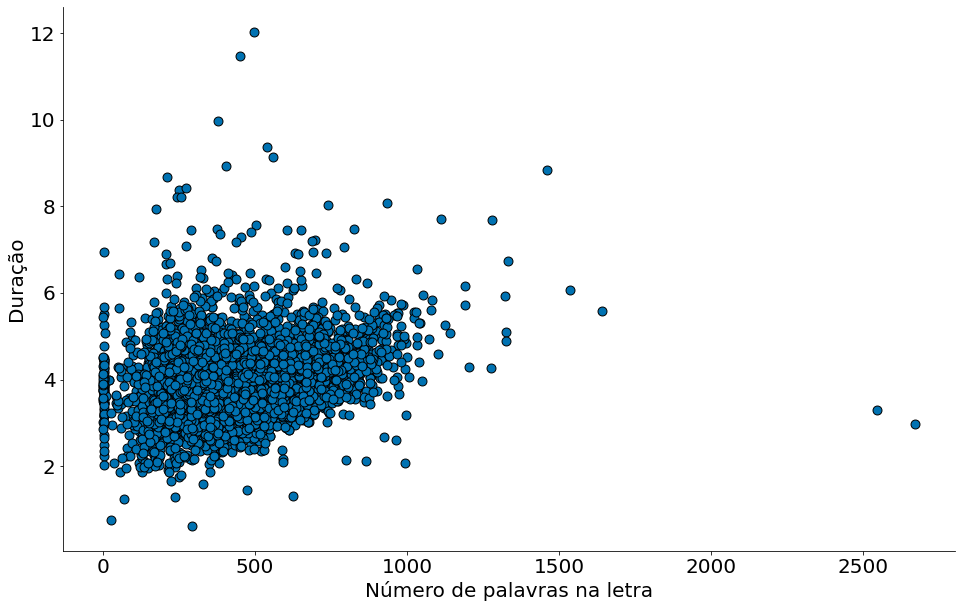

In [ ]:
plt.scatter(x, y, edgecolor='k', s=80)
plt.xlabel('Número de palavras na letra')
plt.ylabel('Duração')
despine()

## **Resumo**
Como o nome sugere, a estatística descritiva auxilia na descrição de dados, permitindo compreender as as características desses. A análise descritiva não tem o objetivo de prever algo, fazer suposições ou inferência, mas simplesmente fornecer uma descrição da aparência da amostra de dados que se pretenden utilizar para extrair conhecimento.


## **Exercícios**

Escolha uma fonte dados, exceto a utilizada neste notebook e execute: 

1.   faça a extração desses dados para um dataframe;
2.   verifique a necessidade de tratamento dos dados extraídos no que diz a respeito a falta de dados ou dados sujos;
1.   verifique o tipos de variáveis contidos no dataframe 
2.   Verifique se os dados da extração são paramétricos (normal) ou não paramétricos. Dados paramétricos significam que a média e a mediana têm valores muito próximos e, ambas são representativas dos grupos a que pertencem. Quando os dados ou amostra é não paramétrica (não normal) a média passa a ter comportamento discrepante em relação à mediana e, portanto, deixa de ser representativa.

Este exercício é um prelúdio para a atividade de análise exploratória de dados que teremos como avaliação (N1).



